# Installation

In [1]:
import pandas as pd
import numpy as np

import dateutil.parser
from dateutil.parser import parse
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


# Project Intro

A construction company has an annual maintence at the MTA at the beginning of each winter. The company plans to work during the hours where foot traffic is the least in 4 hour shifts. They have to stop by every station and attempt to not cause congestion in the MTA.

This construction company has ultimitely solicited our involvement to utilize the publically accessible MTA data to optimize the work hours such that they can avoid the most people.

# Goal / Method

Our goal in this presentation is to minimize the impact on foot traffic by doing work during the slowest times in the week.

To do this we will look at the MTA data to determine how much foot traffic is there throughout the week and then look into lower flow days to figure out a good time.

# Things to keep in mind

How long do we have to work on this project?

Do we have multiple teams avaliable to work on different stations at the same time?

# 1. Importing Data

In [2]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [210605, 210612, 210619,210626,210703,210710,210717,210724,210731,210807,210814,210821,210828]
mta_df = get_data(week_nums)

In [3]:
#mta_df.info()

In [4]:
#mta_df.describe()

# Managing Duplicates

In [5]:
mta_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE","TIME"], inplace=True)

# 2. Entry Data

In [6]:
entries_daily = (mta_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False).ENTRIES.first())
entries_daily[["PREV_DATE", "PREV_ENTRIES"]] = (entries_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))

entries_daily = entries_daily.reset_index()
entries_daily['DAILY_ENTRIES'] = entries_daily.groupby(['C/A','UNIT','SCP','STATION']).PREV_ENTRIES.diff().shift(-1)

<ipython-input-6-871915b1cc85>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  entries_daily[["PREV_DATE", "PREV_ENTRIES"]] = (entries_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1)))


In [7]:
entries_daily.loc[entries_daily['DAILY_ENTRIES'] <= 0 , 'DAILY_ENTRIES'] = np.nan
entries_daily.loc[entries_daily['DAILY_ENTRIES'] > 100000 , 'DAILY_ENTRIES'] = np.nan
entries_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
entries_daily.head()

,index,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,1,A002,R051,02-00-00,59 ST,05/30/2021,7579078,05/29/2021,7578734.0,344.0
2,2,A002,R051,02-00-00,59 ST,05/31/2021,7579312,05/30/2021,7579078.0,234.0
3,3,A002,R051,02-00-00,59 ST,06/01/2021,7579653,05/31/2021,7579312.0,341.0
4,4,A002,R051,02-00-00,59 ST,06/02/2021,7580250,06/01/2021,7579653.0,597.0
5,5,A002,R051,02-00-00,59 ST,06/03/2021,7580823,06/02/2021,7580250.0,573.0


In [8]:
entries_sum = entries_daily.groupby('STATION')['DAILY_ENTRIES'].sum()
entries_sum.sort_values(ascending=False, inplace=True)
entries_sum.head(10)

STATION
34 ST-PENN STA     3839309.0
34 ST-HERALD SQ    2885978.0
GRD CNTRL-42 ST    2728680.0
86 ST              2545495.0
23 ST              2480912.0
14 ST-UNION SQ     2386523.0
125 ST             2361816.0
42 ST-PORT AUTH    2342000.0
TIMES SQ-42 ST     2168423.0
FLUSHING-MAIN      2073376.0
Name: DAILY_ENTRIES, dtype: float64

# 3. Exit Data

For now I am having a bug with it so I will use just entries until I can use exit data as well.

In [9]:
# exits_daily = (mta_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False).EXITS.first())

In [10]:
# exits_daily[["PREV_DATE", "PREV_EXITS"]] = (entries_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "EXITS"].apply(lambda grp: grp.shift(1)))

# exits_daily = entries_daily.reset_index()
# exits_daily['DAILY_EXITS'] = exits_daily.groupby(['C/A','UNIT','SCP','STATION']).PREV_EXITS.diff().shift(-1)

In [11]:
# exits_daily.loc[entries_daily['DAILY_EXITS'] <= 0 , 'DAILY_EXITS'] = np.nan
# exits_daily.loc[entries_daily['DAILY_EXITS'] > 100000 , 'DAILY_EXITS'] = np.nan
# exits_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
# exits_daily.head()

In [12]:
# exits_sum = exits_daily.groupby('STATION')['DAILY_ENTRIES'].sum()
# exits_sum.sort_values(ascending=False, inplace=True)
# exits_sum.head(10)

# 4. Total Traffic
Will be finished when exit data can be solved

In [13]:
# df_total_traffic = entries_sum.add(exits_sum, fill_value = 0)
# df_total_traffic.sort_values(ascending=False,inplace=True)
# df_combined_traffic.head(10)

In [14]:
# # Histogram

# plt.hist(df_total_traffic)
# plt.title("Distribution of Traffic By Station")
# plt.xlabel("# of Stations")
# plt.ylabel("Total Traffic")

In [15]:
# top_25 = df_total_traffic.head(25)

# top_25.plot(kind='bar',figsize=(20,10),title = 'Top Station Traffic')

# Temporary Subsitute Till Exits are debugged

Text(0, 0.5, 'Total Traffic')

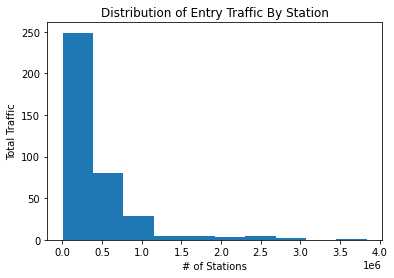

In [16]:
plt.hist(entries_sum)
plt.title("Distribution of Entry Traffic By Station")
plt.xlabel("# of Stations")
plt.ylabel("Total Traffic")

<AxesSubplot:title={'center':'Top Stations'}, xlabel='STATION'>

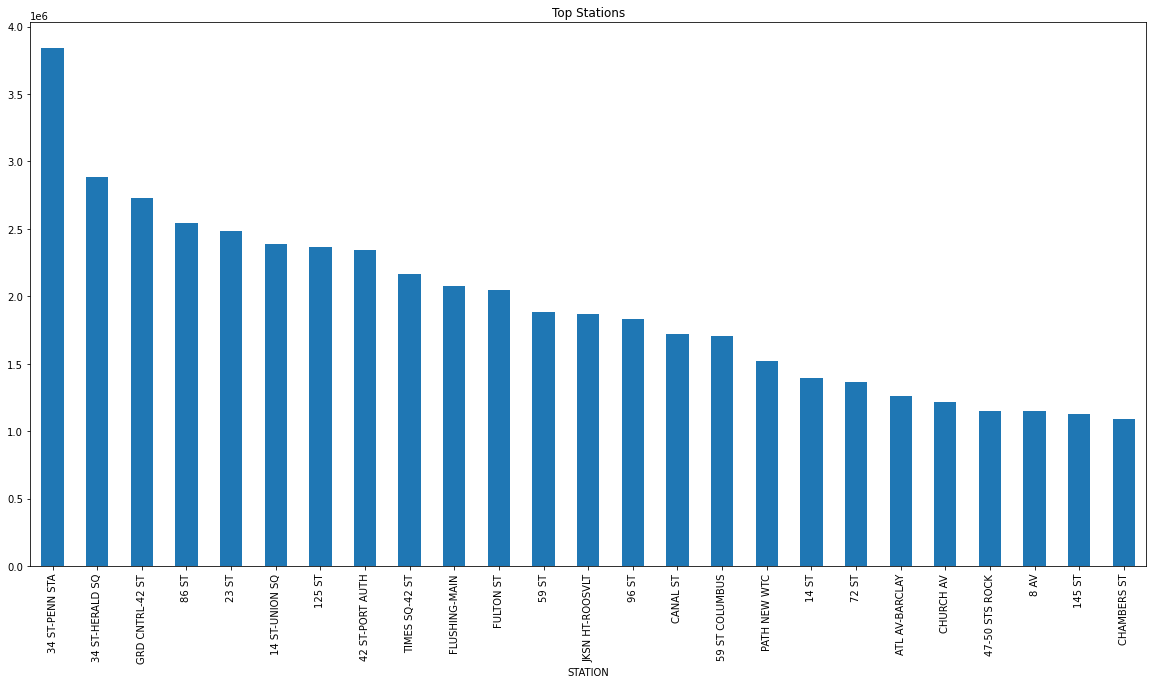

In [17]:
top_25 = entries_sum.head(25)

top_25.plot(kind='bar',figsize=(20,10),title = "Top Stations")

# Top 5 Stations

I will be using a temporary solution until I can figure out what is wrong with my keyerror for exits

In [18]:
df_top = mta_df.loc[(mta_df['STATION']=='34 ST-PENN STA') | (mta_df['STATION']=="34 ST-HERALD SQ") | (mta_df['STATION']=="GRD CNTRL-42 ST") | (mta_df['STATION']=="86 ST") | (mta_df['STATION']=="23 ST")]

In [19]:
df_top['DATE'] = pd.to_datetime(df_top['DATE'])

<ipython-input-19-708a7bcfd9b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['DATE'] = pd.to_datetime(df_top['DATE'])


In [20]:
df_top["DOW"] = df_top['DATE'].dt.dayofweek

<ipython-input-20-ba6cc372a33c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top["DOW"] = df_top['DATE'].dt.dayofweek


In [21]:
df_top['PAR_TIME'] = df_top['TIME'].apply(parse)

<ipython-input-21-e382c0690555>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['PAR_TIME'] = df_top['TIME'].apply(parse)


In [22]:
#df_top = df_top[df_top['DOW'].isin([0,1,2,3,4])]

In [23]:
df_top['ENTRIES_DIFF'] = df_top['ENTRIES'].diff(1);
# df_top['EXITS_DIFF'] = df_top['EXITS'].diff(1);
# df_top['TOTAL_TRAFF'] = df_top['ENTRIES_DIFF'] + df_top["EXITS_DIFF"]
df_top['TOTAL_TRAFF'] = df_top['ENTRIES_DIFF']

<ipython-input-23-b96d0dd688e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['ENTRIES_DIFF'] = df_top['ENTRIES'].diff(1);
<ipython-input-23-b96d0dd688e3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['TOTAL_TRAFF'] = df_top['ENTRIES_DIFF']


In [24]:
df_top.loc[df_top['ENTRIES_DIFF'] <= 0.0, 'ENTRIES_DIFF'] = np.nan;
df_top.loc[df_top['ENTRIES_DIFF'] > 10000.0, 'ENTRIES_DIFF'] = np.nan;
# df_top.loc[df_top['EXITS_DIFF'] <= 0.0, 'EXITS_DIFF'] = np.nan;
# df_top.loc[df_top['EXITS_DIFF'] > 10000.0, 'EXITS_DIFF'] = np.nan;
df_top.loc[df_top['TOTAL_TRAFF'] <= 0.0, 'TOTAL_TRAFF'] = np.nan;
df_top.loc[df_top['TOTAL_TRAFF'] > 100000.0, 'TOTAL_TRAFF'] = np.nan;

/Users/wesley/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/wesley/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/wesley/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [25]:
total_per_station = df_top.groupby(by='STATION', as_index = False).sum()[['STATION',"TOTAL_TRAFF"]].sort_values('TOTAL_TRAFF',ascending=False)

In [26]:
total_per_station['WEEKLY_TRAFF'] = total_per_station['TOTAL_TRAFF']/7

In [27]:
top_lst = ["34 ST-PENN STA",
           "34 ST-HERALD SQ",
           "GRD CNTRL-42 ST",
           "86 ST",
           "23 ST"
          ]
top_stations = df_top[df_top['STATION'].isin(top_lst)]
top_stations = top_stations.groupby(by=['STATION', 'PAR_TIME'], as_index=False).sum()[['STATION', 'PAR_TIME','TOTAL_TRAFF']]
top_stations.set_index('PAR_TIME', drop=True, inplace=True)
top_stations = top_stations.groupby(by=['STATION']).resample('4H').mean()
top_stations = top_stations.reset_index()

In [28]:
top_stations

,STATION,PAR_TIME,TOTAL_TRAFF
0,23 ST,2021-09-14 00:00:00,4.399970e+05
1,23 ST,2021-09-14 04:00:00,2.226500e+04
2,23 ST,2021-09-14 08:00:00,2.144983e+04
3,23 ST,2021-09-14 12:00:00,9.702100e+04
4,23 ST,2021-09-14 16:00:00,3.803665e+05
5,23 ST,2021-09-14 20:00:00,4.438905e+05
6,34 ST-HERALD SQ,2021-09-14 00:00:00,1.379539e+06
7,34 ST-HERALD SQ,2021-09-14 04:00:00,6.901000e+04
8,34 ST-HERALD SQ,2021-09-14 08:00:00,1.642390e+05
9,34 ST-HERALD SQ,2021-09-14 12:00:00,4.338180e+05


In [29]:
stations_by_DOW = df_top[df_top['STATION'].isin(top_lst)]
stations_by_DOW = stations_by_DOW.groupby(by=['STATION', 'DOW'], as_index=False).sum()[['STATION', 'DOW','TOTAL_TRAFF']]
stations_by_DOW

,STATION,DOW,TOTAL_TRAFF
0,23 ST,0,349625.0
1,23 ST,1,414941.0
2,23 ST,2,427785.0
3,23 ST,3,433817.0
4,23 ST,4,416338.0
5,23 ST,5,832271.0
6,23 ST,6,215044.0
7,34 ST-HERALD SQ,0,421907.0
8,34 ST-HERALD SQ,1,478342.0
9,34 ST-HERALD SQ,2,483825.0


In [30]:
stations_by_DOW.loc[stations_by_DOW['DOW'] == 0, 'label'] = 'Monday'
stations_by_DOW.loc[stations_by_DOW['DOW'] == 1, 'label'] = 'Tuesday'
stations_by_DOW.loc[stations_by_DOW['DOW'] == 2, 'label'] = 'Wednesday'
stations_by_DOW.loc[stations_by_DOW['DOW'] == 3, 'label'] = 'Thursday'
stations_by_DOW.loc[stations_by_DOW['DOW'] == 4, 'label'] = 'Friday'
stations_by_DOW.loc[stations_by_DOW['DOW'] == 5, 'label'] = 'Saturday'
stations_by_DOW.loc[stations_by_DOW['DOW'] == 6, 'label'] = 'Sunday'

/Users/wesley/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Traffic flow by Weekday')

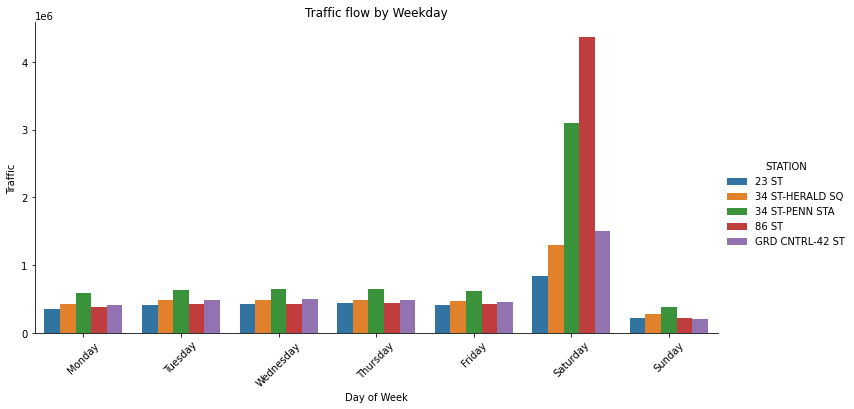

In [31]:
weekday_bar = sns.catplot('label', 'TOTAL_TRAFF', hue ='STATION', kind = 'bar', data = stations_by_DOW, aspect = 2)
plt.xticks(rotation=45)
plt.xlabel('Day of Week')
plt.ylabel('Traffic')
plt.title('Traffic flow by Weekday')

In [32]:
df_top.sample(30)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DOW,PAR_TIME,ENTRIES_DIFF,TOTAL_TRAFF
140122,R141,R031,00-00-00,34 ST-PENN STA,123,IRT,2021-06-01,08:00:00,REGULAR,7769244,10319992,1,2021-09-14 08:00:00,16.0,16.0
162941,R240,R047,00-03-02,GRD CNTRL-42 ST,4567S,IRT,2021-07-30,01:00:00,REGULAR,410968,369305,4,2021-09-14 01:00:00,20.0,20.0
162859,R240,R047,00-03-01,GRD CNTRL-42 ST,4567S,IRT,2021-08-01,13:00:00,REGULAR,7620572,11467788,6,2021-09-14 13:00:00,5.0,5.0
3492,A022,R022,01-06-01,34 ST-HERALD SQ,BDFMNQRW,BMT,2021-07-12,12:00:00,REGULAR,5588302,8949602,0,2021-09-14 12:00:00,9.0,9.0
145465,R164,R167,00-03-02,86 ST,1,IRT,2021-08-16,13:00:00,REGULAR,5008088,1474163,0,2021-09-14 13:00:00,100.0,100.0
140888,R142,R293,01-00-01,34 ST-PENN STA,123ACE,IRT,2021-06-29,10:00:00,REGULAR,1154444167,1116110626,1,2021-09-14 10:00:00,75.0,75.0
57771,N075,R111,01-06-00,23 ST,CE,IND,2021-06-10,12:00:00,REGULAR,104740096,182759,3,2021-09-14 12:00:00,109.0,109.0
58576,N077,R111,02-00-02,23 ST,CE,IND,2021-07-05,16:00:00,REGULAR,4110474,1626422,0,2021-09-14 16:00:00,89.0,89.0
161458,R238,R046,00-00-02,GRD CNTRL-42 ST,4567S,IRT,2021-08-07,16:00:00,REGULAR,148965,1415603,5,2021-09-14 16:00:00,51.0,51.0
139120,R138,R293,00-00-03,34 ST-PENN STA,123ACE,IRT,2021-07-22,18:00:00,REGULAR,3213926,1465535,3,2021-09-14 18:00:00,249.0,249.0
